C:\Users\bikra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Multiclass Logistic Regression ===
Accuracy: 97.33%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



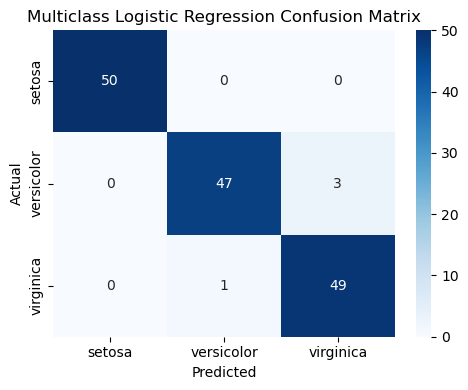


=== Binary Logistic Regression (Setosa vs Versicolor) ===
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



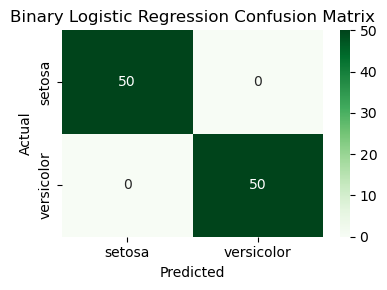

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal and petal length/width)
y = iris.target  # Target classes (0=setosa, 1=versicolor, 2=virginica)

# Step 2: Multiclass Logistic Regression (using all 3 classes)
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
multi_model.fit(X, y)
y_pred_multi = multi_model.predict(X)

# Step 3: Evaluate Multiclass Model
print("=== Multiclass Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y, y_pred_multi) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y, y_pred_multi, target_names=iris.target_names))

# Step 4: Visualize Confusion Matrix
cm_multi = confusion_matrix(y, y_pred_multi)
plt.figure(figsize=(5,4))
sns.heatmap(cm_multi, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Multiclass Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
# plt.savefig("iris_multiclass_confusion.png")
plt.show()

# Step 5: Binary Logistic Regression (only class 0 vs 1)
# Filter only setosa and versicolor
binary_filter = y < 2
X_binary = X[binary_filter]
y_binary = y[binary_filter]
binary_model = LogisticRegression(solver='lbfgs')
binary_model.fit(X_binary, y_binary)
y_pred_binary = binary_model.predict(X_binary)

# Step 6: Evaluate Binary Model
print("\n=== Binary Logistic Regression (Setosa vs Versicolor) ===")
print(f"Accuracy: {accuracy_score(y_binary, y_pred_binary) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_binary, y_pred_binary, target_names=iris.target_names[:2]))

# Step 7: Binary Confusion Matrix
cm_binary = confusion_matrix(y_binary, y_pred_binary)
plt.figure(figsize=(4,3))
sns.heatmap(cm_binary, annot=True, cmap='Greens', fmt='d',
            xticklabels=iris.target_names[:2],
            yticklabels=iris.target_names[:2])
plt.title("Binary Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
# plt.savefig("iris_binary_confusion.png")
plt.show()